In [61]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_csv(r"C:\Users\annum\Downloads\smsdata\spam.csv", encoding='latin1')

In [63]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [64]:
df.shape

(5572, 5)

In [65]:
# 1. data cleaning
# 2. eda
# 3. text preprocessing
# 4. model building
# 5. evaluation
# 6. improvement
# 7. website
# 8. deployment

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [67]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [68]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [69]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [70]:
# in target col its written ham/spam 
# we want numbers 0/1, so we'll label encode it

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [71]:
df['target']=encoder.fit_transform(df['target'])

In [72]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [73]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [74]:
# check for duplicates
df.duplicated().sum()

403

In [75]:
# remove these 403 duplicated values
df = df.drop_duplicates(keep='first')

In [76]:
df.duplicated().sum()

0

In [77]:
df.shape

(5169, 2)

In [78]:
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [79]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

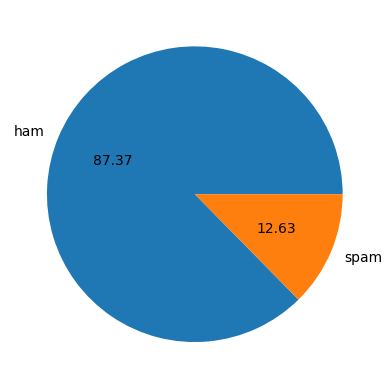

In [80]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [81]:
# data is imbalanced

In [82]:
# now we'll see how many alphabets, words, sentences and paragraphs are being used in the dataset

In [83]:
# now, we will create 3 new cols in ds
# #words, #characters, #sentences in the sms's

In [84]:
import nltk

In [85]:
df['num_character']= df['text'].apply(len) #this will give the #character used in each sms

In [86]:
df.head(1)

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111


In [87]:
# no. of words per sms
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [88]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [89]:
df.head(1)

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24


In [90]:
# number of sentences per sms
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [91]:
df.head(1)

,target,text,num_character,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [92]:
df[['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [93]:
# decribe code for ham msgs
df[df['target']==0][['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [94]:
# decribe code for spam msgs
df[df['target']==1][['num_character','num_words','num_sent']].describe()

,num_character,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [95]:
# plot histogram for both spam and ham
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

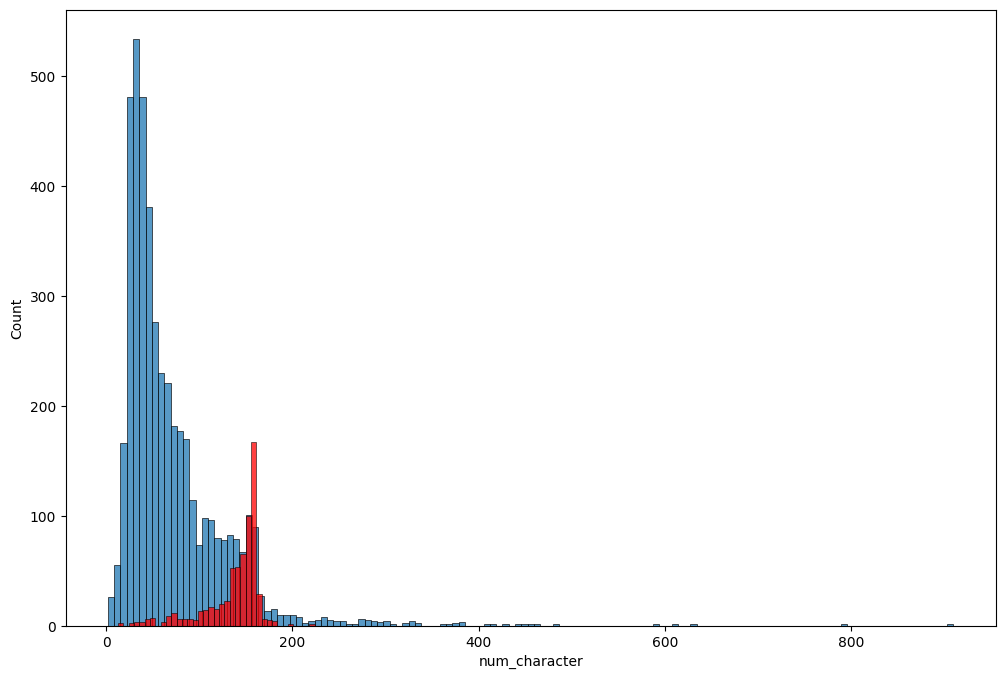

In [96]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

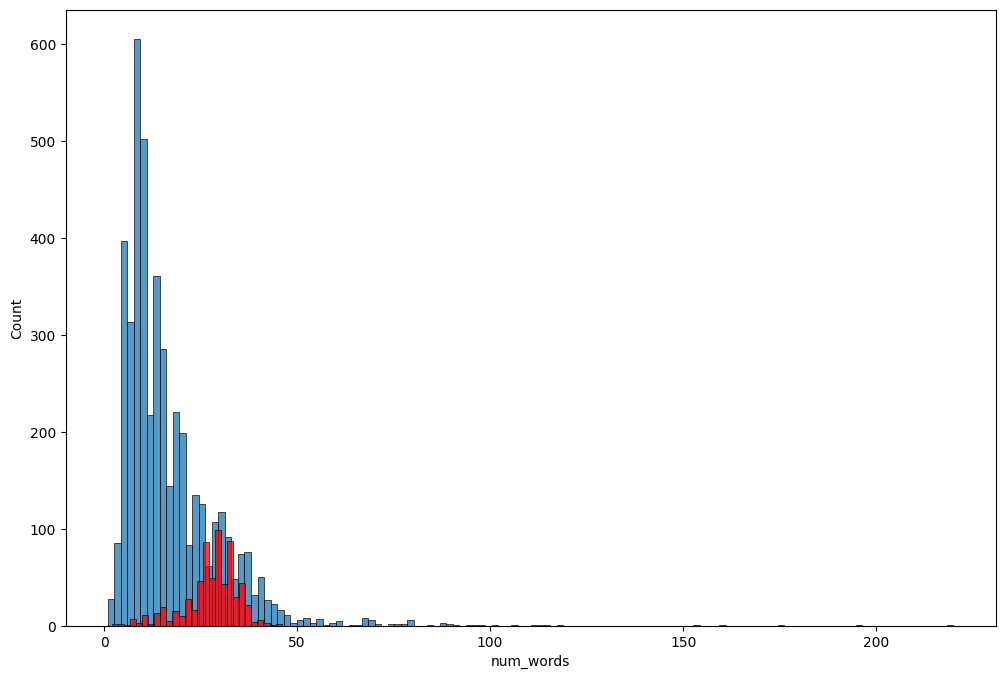

In [97]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

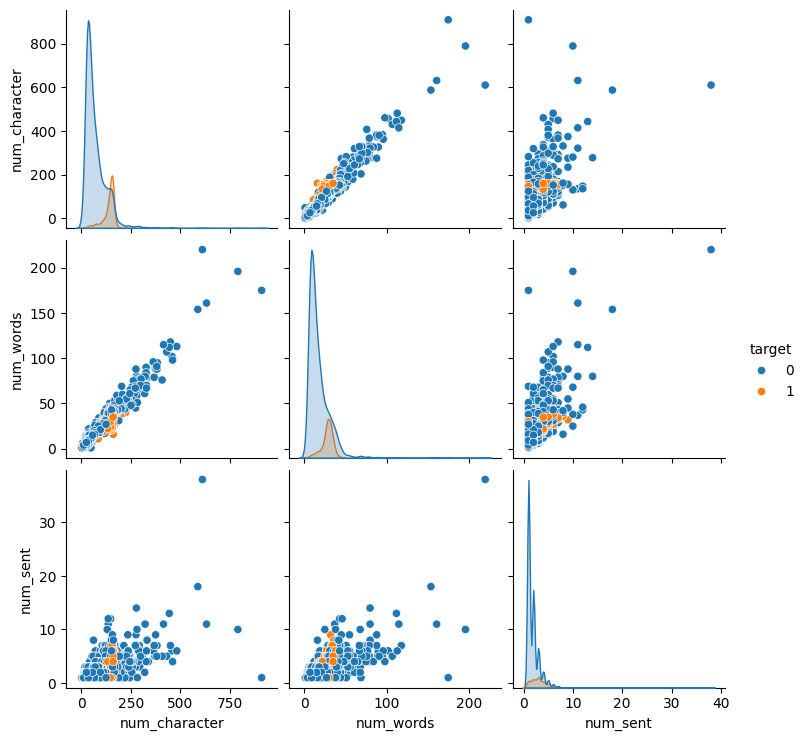

In [98]:
# let's see the relationship btw these 2 cols
sns.pairplot(df,hue='target')

In [99]:
df.head(1)

,target,text,num_character,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [100]:
from nltk.corpus import stopwords
import string

In [101]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\annum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
from nltk.tokenize import word_tokenize

In [103]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [105]:
def transform_text(text):
    text = text.lower() #lowercase
    text = word_tokenize(text) #tokenize

    #remove special char
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    # remove stopwords and pucnctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    
    return " ".join(y)

In [106]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [107]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [108]:
df['transform_text'] = df['text'].apply(transform_text)

In [109]:
df.head(1)

,target,text,num_character,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [110]:
# now we'll se the most frequently used words in hams and spams
# basically will make wordclouds that'll make these words look bigger

In [111]:
from wordcloud import WordCloud
wc = WordCloud(width =50,height=50,min_font_size=5,background_color='white')

In [112]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

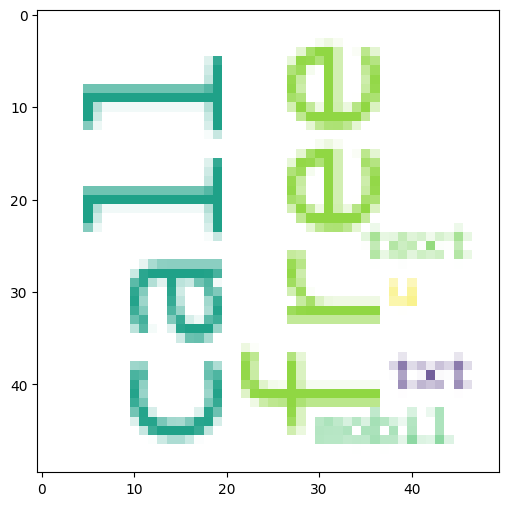

In [113]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

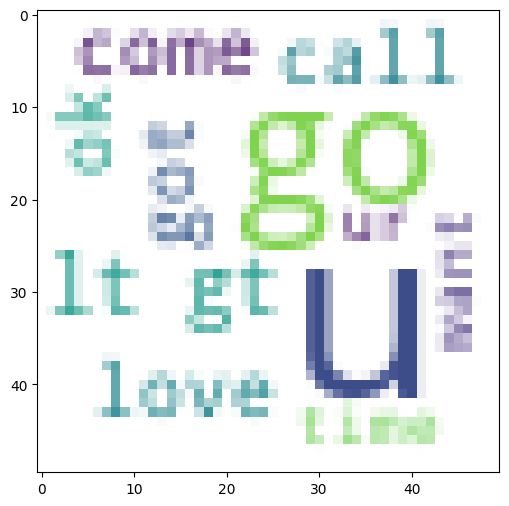

In [114]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [115]:
# lets find out ham and spam top 30 words.

In [116]:
df.head(1)

,target,text,num_character,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...


In [117]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [118]:
len(spam_corpus)

9939

In [119]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:

# Create a DataFrame from the Counter result
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=spam_word_counts, x='Word', y='Frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 30 Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# for ham

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:

# Create a DataFrame from the Counter result
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=ham_word_counts, x='Word', y='Frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 30 Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
len(ham_corpus)

In [129]:
#1. Naive Bayes(requires numerical input)

In [130]:
# first we willconvert text into vectors and feed it into algo as inputs

from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [131]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [132]:
# x = cv.fit_transform(df['transform_text']).toarray()
x = tfidf.fit_transform(df['transform_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [133]:
x.shape #(msgs, words)

(5169, 3000)

In [134]:
#extract y
y = df['target'].values

In [135]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [136]:
from sklearn.model_selection import train_test_split


In [137]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [138]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [139]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [142]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[885   0]
 [ 33 116]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
# choosing tfidf with mnb

In [125]:
# comparing other ml algo's with mnb

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [126]:
# creating objects of every algo
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2,algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [127]:
# creating a dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [ ]:
def train_classifier(clf, x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc, x_train,y_train,x_test,y_test)

In [ ]:
# now running loop on the dictionary to store the precison and accuracy 
# of all the algo's

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

    print("for ",name)
    print("accuracy- ", current_accuracy)
    print("precision- ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
 performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores})

In [ ]:
performance_df

In [ ]:
# model improvement
# change the max_feature parameter in tfid
# after applying tfidf on x, we can scale the values of array btw 0-1

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
#voting classifier - combination of multiple algos
scv = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb =  MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)], voting='soft')

In [ ]:
voting.fit(x_train,y_train)

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

In [ ]:
# applying stacking
estimators=[('svm', svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

In [143]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))